# Hello world: print 1 neuron trace

In [1]:
import numpy as np
from spikeflow import BPNNModel, IzhikevichNeuronLayer
import spikeflow.drawing_utils.trace_renderers as rend

/Applications/Anaconda/anaconda/envs/mlbook/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Create a neuron layer with a single neuron, and create the model

In [2]:
model_input_shape = (1,)

nl = IzhikevichNeuronLayer.layer_from_tuples([
    IzhikevichNeuronLayer.C(a=0.010, b=0.2, c=-65.0, d=6.0, t=30.0, v0=0.0)
])

model = BPNNModel.compiled_model(model_input_shape, [nl], [])

# Run the model for 2000 timesteps

In [3]:
traces = []

def end_time_step_callback(i, graph, sess, results):
    traces.append(results)
    
data = (np.ones(1,)*(7 if i > 1200 else 0) for i in range(0, 2000))
    
model.run_time(data, end_time_step_callback)

# Extract the data we want (neuron 0's traces) and display

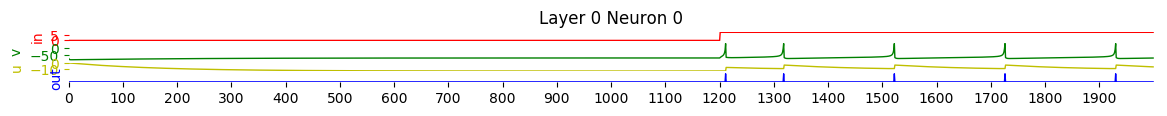

In [4]:
neuron_layer_0_traces = np.array([r[0] for r in traces])

rend.render_figure([rend.IzhikevichNeuronTraceRenderer(neuron_layer_0_traces, 
                                                       'Layer 0 Neuron')], 
                   0, 2000)

# Often ignore first 1000 timesteps (let model settle with 0 input)

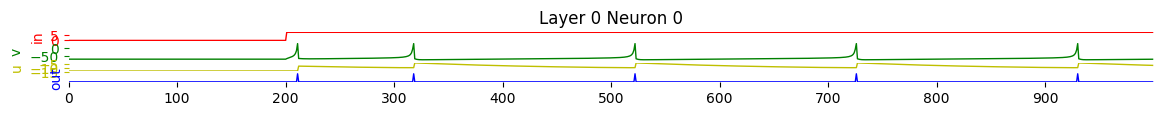

In [5]:
rend.render_figure([rend.IzhikevichNeuronTraceRenderer(neuron_layer_0_traces, 
                                                       'Layer 0 Neuron')], 
                   1000, 2000)